   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


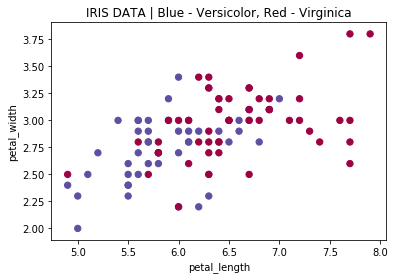

'2018036040 김중석'

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('C:/Users/김중석/PycharmProjects/')
iris = pd.read_csv('C:/Users/김중석/Desktop/iris.csv')

print(iris.head())

iris.loc[iris['species']=='virginica', 'species'] = 0
iris.loc[iris['species']=='versicolor', 'species'] = 1
iris.loc[iris['species']=='setosa', 'species'] = 2
iris = iris[iris['species']!=2]

X = iris[['sepal_length', 'sepal_width']].values.T
Y = iris[['species']].values.T
Y = Y .astype('uint8')

plt.scatter(X[0, :], X[1, :], c = Y[0, :], s = 40, cmap = plt.cm.Spectral);
plt.title("IRIS DATA | Blue - Versicolor, Red - Virginica")
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()
"""2018036040 김중석"""

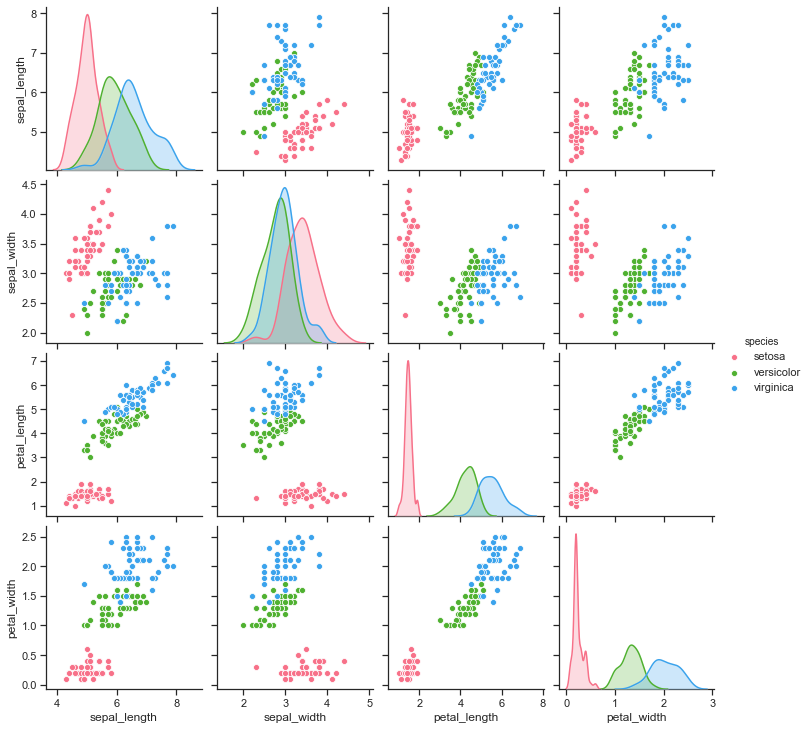

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style = "ticks", color_codes = True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue = "species", palette = "husl")

In [14]:
iris.info()
iris['species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

print(Y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size = 0.2,
                                                   random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


model = Sequential()

model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [17]:
hist = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 3ms/step - loss: 1.1936 - accuracy: 0.3667 - val_loss: 1.2225 - val_accuracy: 0.2000
Epoch 2/100
120/120 [==============================] - 0s 141us/step - loss: 1.0821 - accuracy: 0.3917 - val_loss: 1.1003 - val_accuracy: 0.4667
Epoch 3/100
120/120 [==============================] - 0s 150us/step - loss: 1.0415 - accuracy: 0.4583 - val_loss: 1.0573 - val_accuracy: 0.2000
Epoch 4/100
120/120 [==============================] - 0s 158us/step - loss: 0.9661 - accuracy: 0.3667 - val_loss: 1.0293 - val_accuracy: 0.2000
Epoch 5/100
120/120 [==============================] - 0s 175us/step - loss: 0.9215 - accuracy: 0.3667 - val_loss: 1.0042 - val_accuracy: 0.5000
Epoch 6/100
120/120 [==============================] - 0s 183us/step - loss: 0.8847 - accuracy: 0.6583 - val_loss: 0.9700 - val_accuracy: 0.5667
Epoch 7/100
120/120 [==============================] - 0s 158us/step - loss: 0.8426 - a

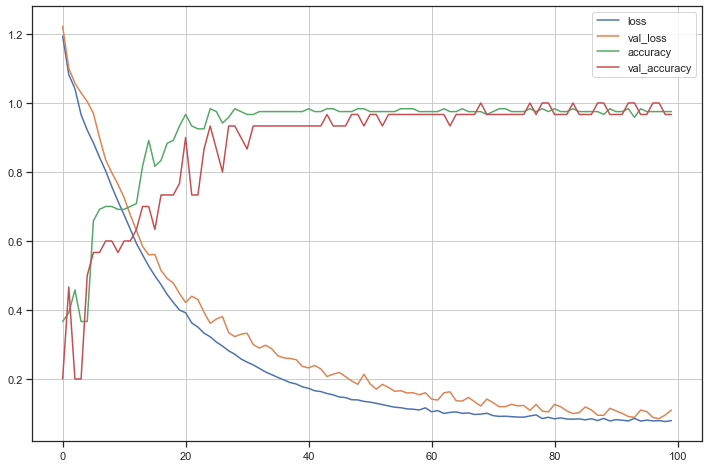

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()